C:\Users\lavan\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette Score: 0.4303514307297939


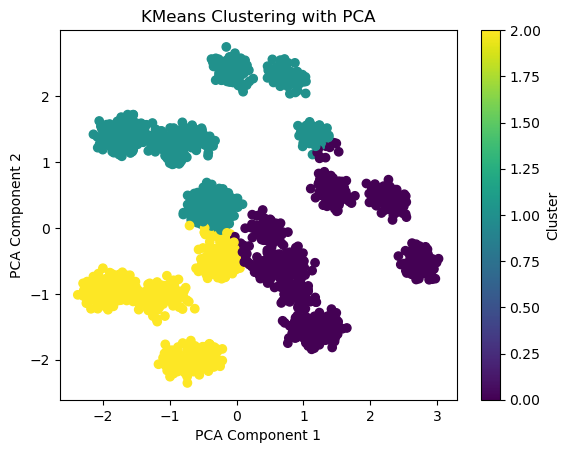

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


df = pd.read_csv('athlete_injury_risk_data_updated.csv')

df = pd.get_dummies(df, columns=['Sport_Type', 'Training_Intensity', 'Recovery_Habits'])

X = df.drop(columns=['Athlete_ID'])  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_pca)

labels = kmeans.labels_

score = silhouette_score(X_pca, labels)
print(f'Silhouette Score: {score}')

import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()